In [ ]:
# This code covers:

# Handling missing values
# Exploratory Data Analysis (EDA)
# Outlier removal using Z-score
# Feature selection
# Balancing dataset using SMOTE
# Standardization/Normalization
# Encoding
# Hyperparameter tuning using various algorithms
# K-Means clustering and Hierarchical clustering
# Displaying features of clusters created

Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Column Names:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Checking for missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dataset Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std

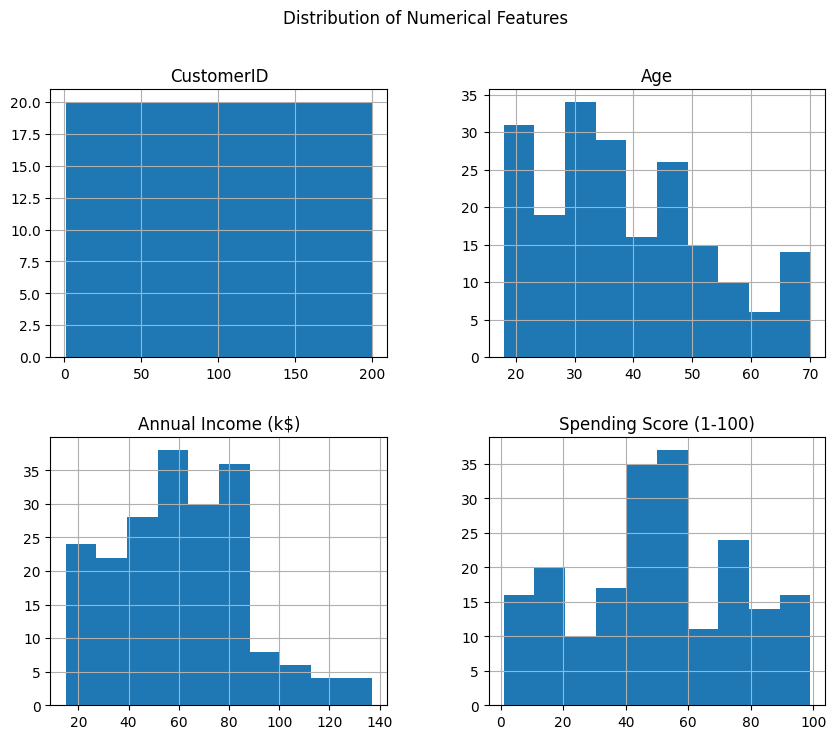

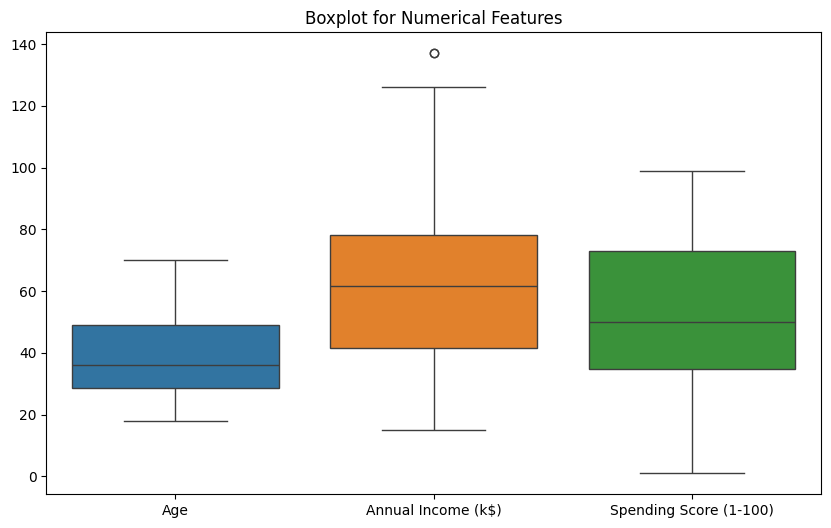

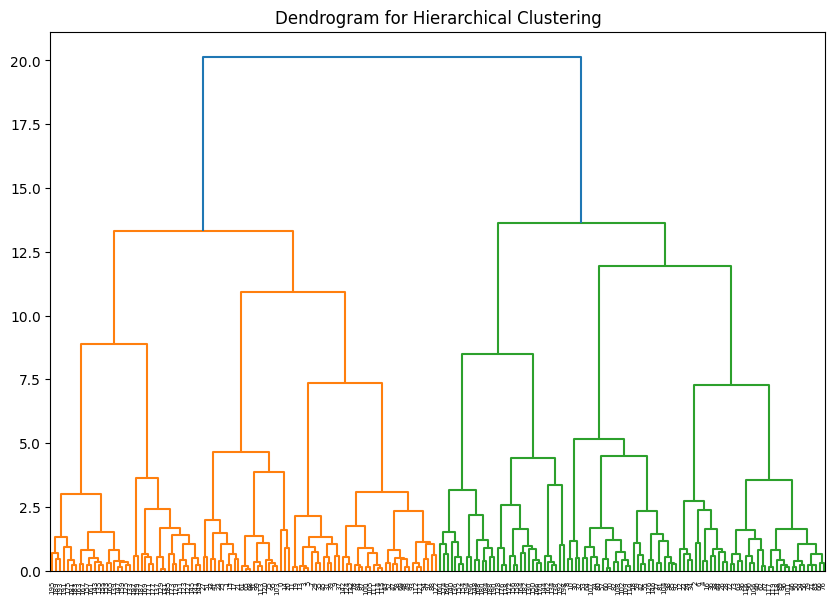

Silhouette Score for n_clusters=2: 0.2776035125578272
Silhouette Score for n_clusters=3: 0.2576199805135528
Silhouette Score for n_clusters=4: 0.29010917402310876
Silhouette Score for n_clusters=5: 0.27191023466188324
Silhouette Score for n_clusters=6: 0.3347543475669217
Silhouette Score for n_clusters=7: 0.3457397879257699
Silhouette Score for n_clusters=8: 0.3727647594212929
Silhouette Score for n_clusters=9: 0.3876146244442297
Silhouette Score for n_clusters=10: 0.42076374869477745

Best KMeans Hyperparameters: {'n_clusters': 10}
Best Silhouette Score: 0.42076374869477745

Silhouette Score for KMeans Clustering: 0.42076374869477745

Cluster Centers for KMeans:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152  1.435058           -0.452983               -0.401952
1  1.128152 -0.976027           -0.737052                0.416038
2 -0.742508  0.169677           -1.316409               -1.166865
3 -0.886405 -0.477932            0.972848                1.22158

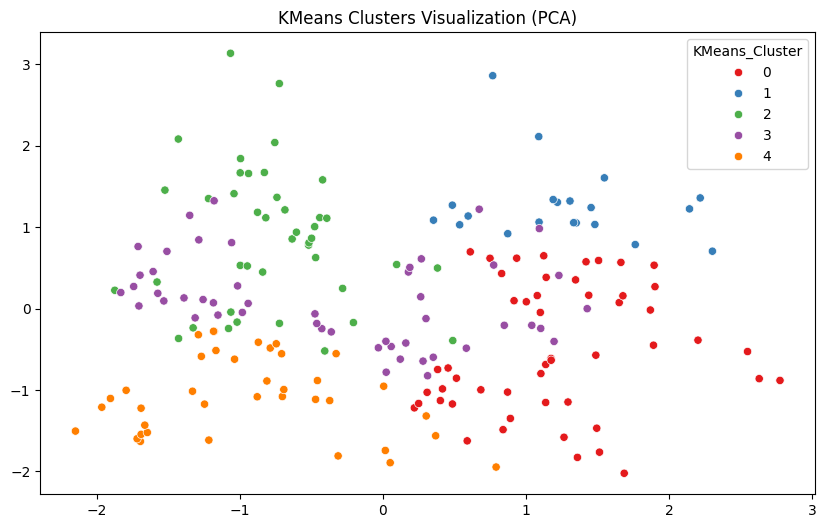

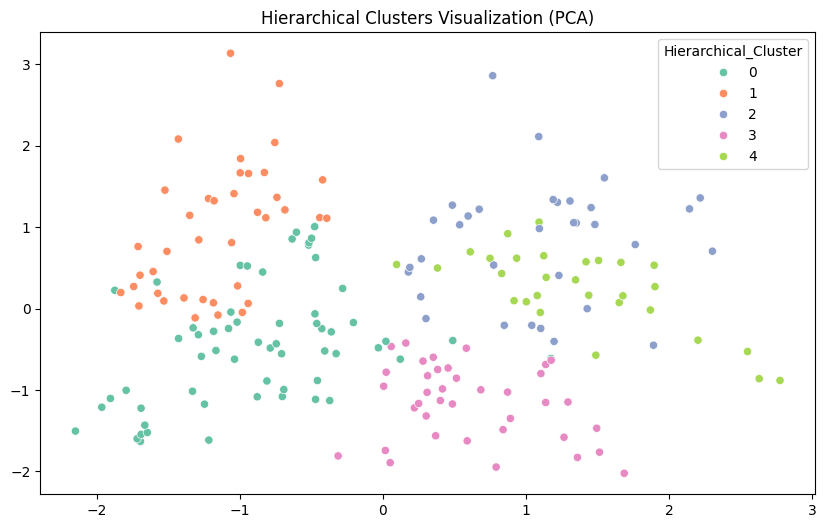

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
url = "https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/refs/heads/master/Mall_Customers.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Checking column names
print("\nColumn Names:")
print(df.columns)

# Handling missing values
print("\nChecking for missing values:")
print(df.isnull().sum())
df = df.dropna()  # Drop rows with missing values for simplicity

# Exploratory Data Analysis (EDA)
print("\nDataset Summary:")
print(df.describe())

# Visualizing the distribution of numerical features
df.hist(bins=10, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot for Numerical Features')
plt.show()

# Outlier removal using Z-score
z_scores = np.abs(zscore(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]))
df = df[(z_scores < 3).all(axis=1)]  # Removing rows with z-score greater than 3

# Feature selection
# Dropping 'CustomerID' as it is not useful for clustering
X = df.drop(columns=['CustomerID'])

# Encoding categorical variables (if any)
# Check for non-numeric columns and encode them
for col in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Now we have only numeric columns in X
# Standardization/Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balancing dataset using SMOTE (if needed)
# SMOTE is generally used for imbalanced classes, but for clustering, it's not needed. Skipping this step.

# PCA for dimensionality reduction (optional for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Hierarchical clustering
linked = linkage(X_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Cutting the dendrogram to form clusters
from sklearn.cluster import AgglomerativeClustering

# Corrected: Use 'metric' instead of 'affinity'
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the range of clusters to evaluate
param_grid = {'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Initialize variables to track the best parameters
best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)  # Calculate silhouette score
    print(f"Silhouette Score for n_clusters={n_clusters}: {score}")

    if score > best_score:
        best_score = score
        best_params = {'n_clusters': n_clusters}

print("\nBest KMeans Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)


# Silhouette Score for KMeans
silhouette = silhouette_score(X_scaled, kmeans.labels_)
print("\nSilhouette Score for KMeans Clustering:", silhouette)

# Displaying features of clusters created by KMeans
print("\nCluster Centers for KMeans:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=X.columns))

# Calculate the mean feature values for each KMeans cluster
kmeans_cluster_means = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Print the mean feature values for KMeans clusters
print("\nMean Feature Values for KMeans Clusters:")
print(kmeans_cluster_means)


# Displaying features of clusters created by Hierarchical Clustering
print("\nCluster Assignments for Hierarchical Clustering:")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Hierarchical_Cluster']].head())

# Calculate the mean feature values for each hierarchical cluster
hierarchical_cluster_means = df.groupby('Hierarchical_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nMean Feature Values for Hierarchical Clusters:")
print(hierarchical_cluster_means)


# Visualizing the clusters
# the visualization of the clusters based on a reduced dimensionality (like PCA).
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('KMeans Clusters Visualization (PCA)')
plt.show()

# Visualizing the Hierarchical Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Hierarchical_Cluster'], palette='Set2')
plt.title('Hierarchical Clusters Visualization (PCA)')
plt.show()


Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Column Names:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Checking for missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dataset Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std

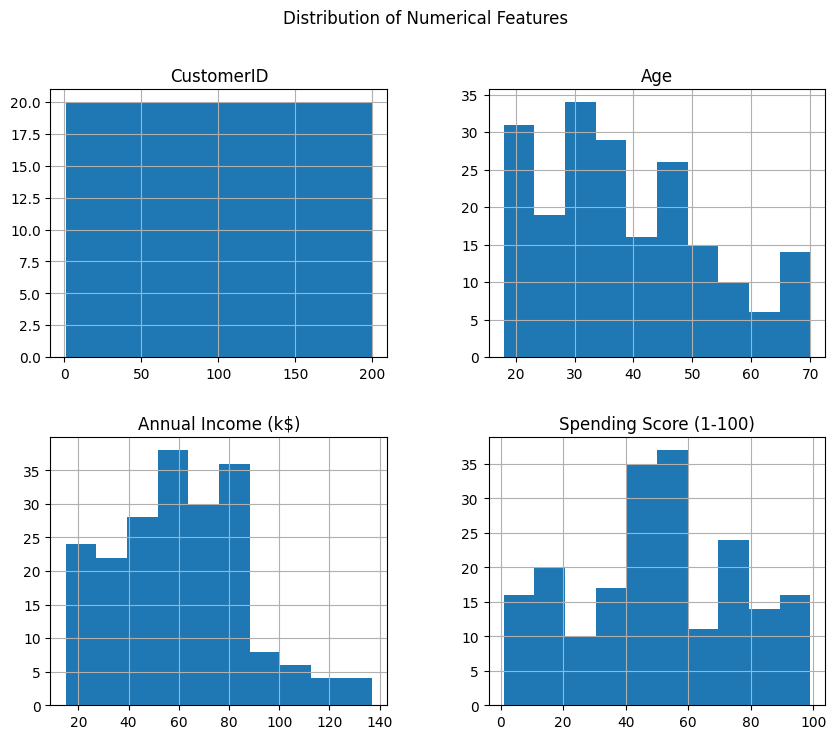

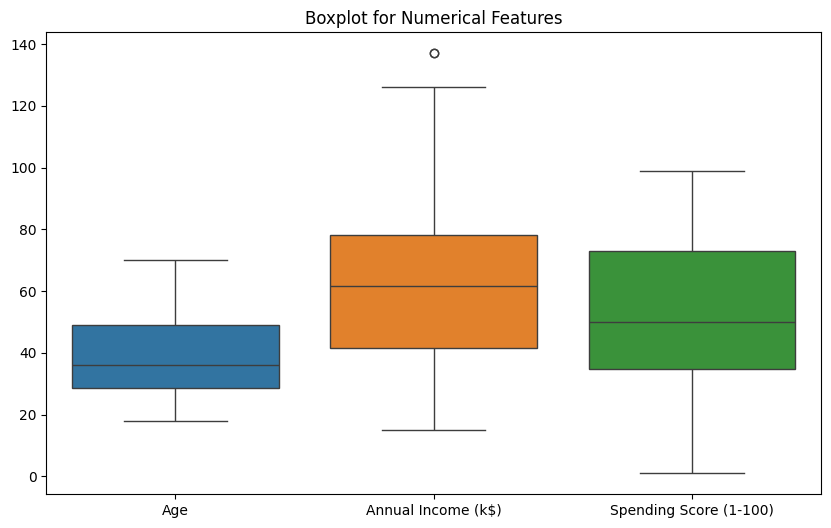

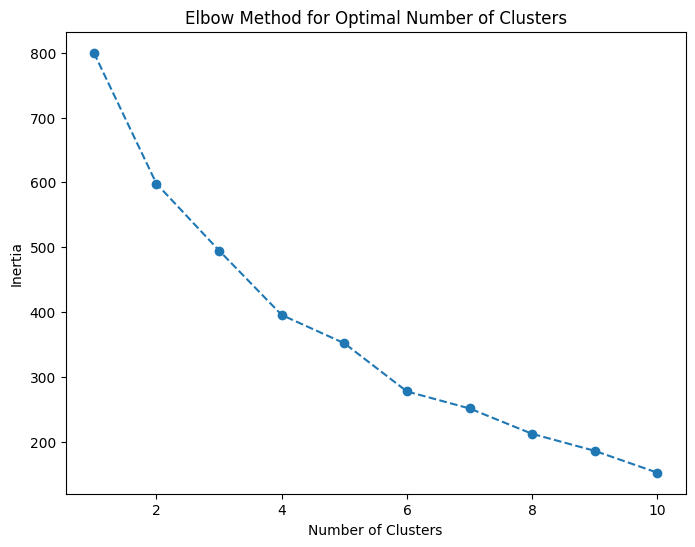

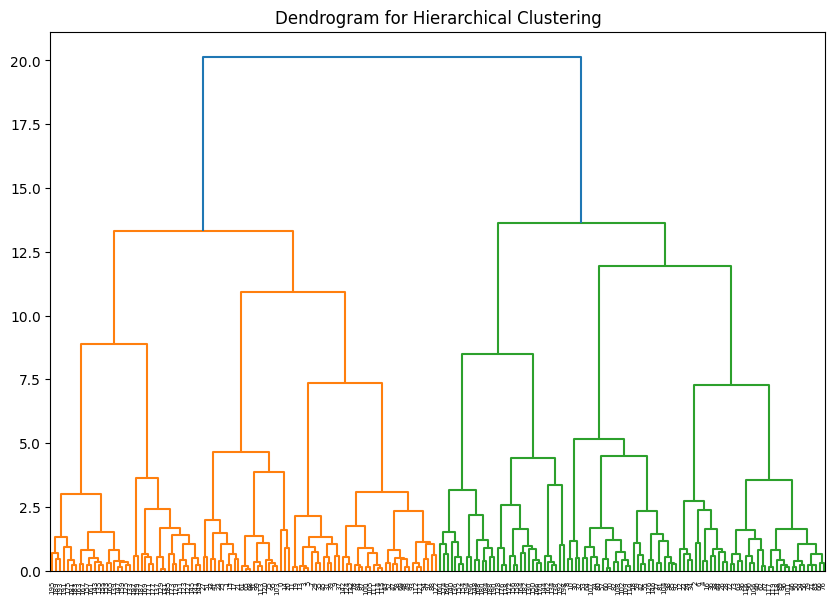

Silhouette Score for n_clusters=2: 0.2776035125578272
Silhouette Score for n_clusters=3: 0.2576199805135528
Silhouette Score for n_clusters=4: 0.29010917402310876
Silhouette Score for n_clusters=5: 0.27191023466188324
Silhouette Score for n_clusters=6: 0.3347543475669217
Silhouette Score for n_clusters=7: 0.3457397879257699
Silhouette Score for n_clusters=8: 0.3727647594212929
Silhouette Score for n_clusters=9: 0.3876146244442297
Silhouette Score for n_clusters=10: 0.42076374869477745

Best KMeans Hyperparameters: {'n_clusters': 10}
Best Silhouette Score: 0.42076374869477745

Silhouette Score for KMeans Clustering: 0.42076374869477745

Cluster Centers for KMeans:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152  1.435058           -0.452983               -0.401952
1  1.128152 -0.976027           -0.737052                0.416038
2 -0.742508  0.169677           -1.316409               -1.166865
3 -0.886405 -0.477932            0.972848                1.22158

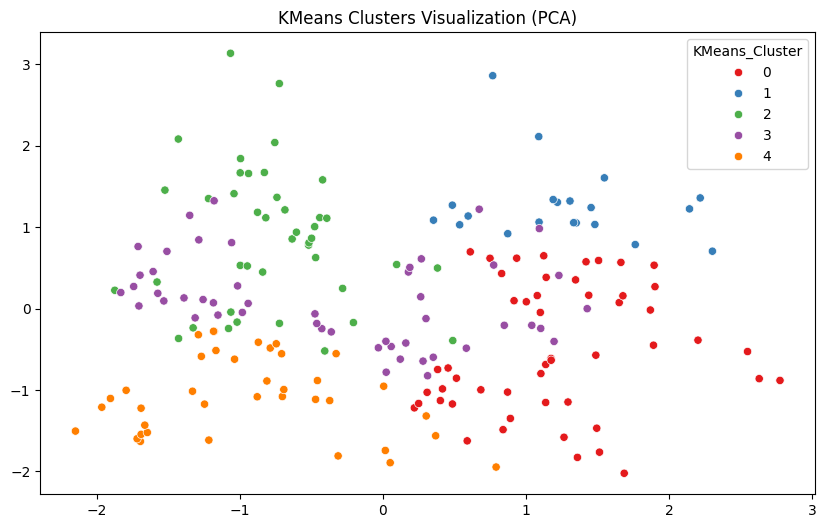

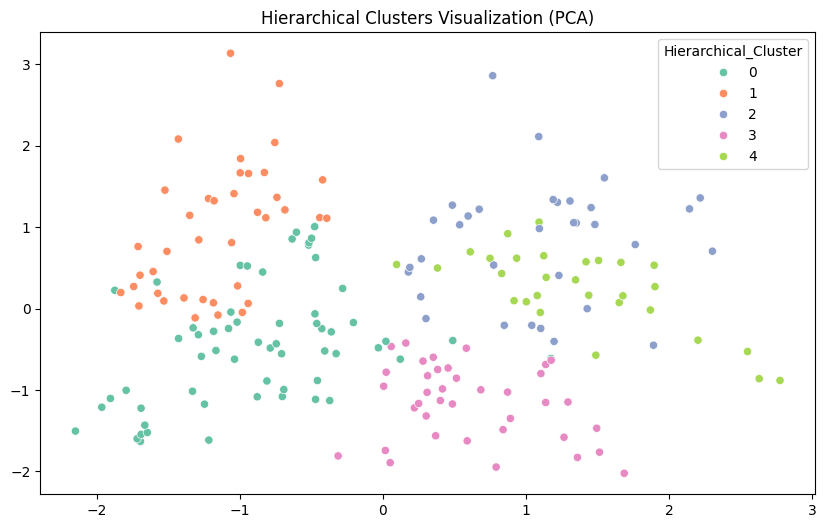

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
url = "https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/refs/heads/master/Mall_Customers.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Checking column names
print("\nColumn Names:")
print(df.columns)

# Handling missing values
print("\nChecking for missing values:")
print(df.isnull().sum())
df = df.dropna()  # Drop rows with missing values for simplicity

# Exploratory Data Analysis (EDA)
print("\nDataset Summary:")
print(df.describe())

# Visualizing the distribution of numerical features
df.hist(bins=10, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot for Numerical Features')
plt.show()

# Outlier removal using Z-score
# Outlier removal using Z-score
z_scores = np.abs(zscore(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]))
df = df[(z_scores < 3).all(axis=1)]  # Removing rows with z-score greater than 3


# Feature selection
# Dropping 'CustomerID' as it is not useful for clustering
X = df.drop(columns=['CustomerID'])

# Encoding categorical variables (if any)
for col in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Now we have only numeric columns in X
# Standardization/Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find the optimal number of clusters for KMeans
inertia_values = []  # List to store inertia values

# Define the range of clusters to evaluate
cluster_range = range(1, 11)  # Evaluate between 1 to 10 clusters

# Calculate inertia for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Hierarchical clustering
linked = linkage(X_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Cutting the dendrogram to form clusters
from sklearn.cluster import AgglomerativeClustering

# Corrected: Use 'metric' instead of 'affinity'
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

# Define the range of clusters to evaluate
param_grid = {'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Initialize variables to track the best parameters
best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)  # Calculate silhouette score
    print(f"Silhouette Score for n_clusters={n_clusters}: {score}")

    if score > best_score:
        best_score = score
        best_params = {'n_clusters': n_clusters}

print("\nBest KMeans Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

# Silhouette Score for KMeans
silhouette = silhouette_score(X_scaled, kmeans.labels_)
print("\nSilhouette Score for KMeans Clustering:", silhouette)

# Displaying features of clusters created by KMeans
print("\nCluster Centers for KMeans:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=X.columns))

# Calculate the mean feature values for each KMeans cluster
kmeans_cluster_means = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Print the mean feature values for KMeans clusters
print("\nMean Feature Values for KMeans Clusters:")
print(kmeans_cluster_means)

# Displaying features of clusters created by Hierarchical Clustering
print("\nCluster Assignments for Hierarchical Clustering:")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Hierarchical_Cluster']].head())

# Calculate the mean feature values for each hierarchical cluster
hierarchical_cluster_means = df.groupby('Hierarchical_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nMean Feature Values for Hierarchical Clusters:")
print(hierarchical_cluster_means)

# Visualizing the clusters
# the visualization of the clusters based on a reduced dimensionality (like PCA).
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('KMeans Clusters Visualization (PCA)')
plt.show()

# Visualizing the Hierarchical Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Hierarchical_Cluster'], palette='Set2')
plt.title('Hierarchical Clusters Visualization (PCA)')
plt.show()
